# Reading *S. cerevisiae* model Yeast8 version 8.5.0

**Citation:**
Lu, H. et al. *A consensus S. cerevisiae metabolic model Yeast8 and its ecosystem for comprehensively probing cellular metabolism.* Nature Communications 10, 3586 (2019). https://doi.org/10.1038/s41467-019-11581-3.

**Pathway scheme** 
# OBS!: NOT SHOWING ALL REACTIONS NEEDED TO CREATE PATHWAY
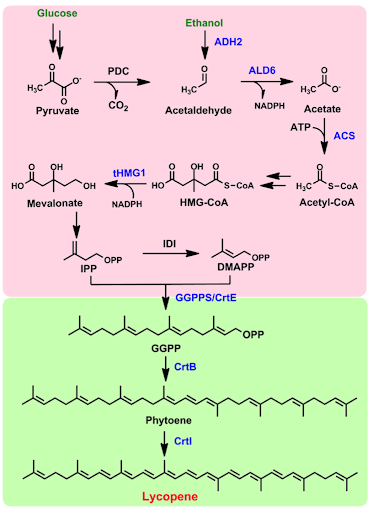

In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

model = read_sbml_model('yeast-GEM.xml')

**Defining metabolites to be incorporated in lycopene pathway**

In [2]:
dmapp = Metabolite(id='dmapp', compartment = 'c', name='Dimethylallyl pyrophosphate', formula='C5H9O7P2')

In [3]:
ggpp = Metabolite(id='ggpp', compartment = 'c', name='Geranyl-geranyl pyrophospate', formula='C20H36O7P2')

In [4]:
phytoene = Metabolite(id='phyto', compartment = 'c', name='Phytoene', formula = 'C40H64')

In [5]:
lycopene = Metabolite(id='lyco', compartment = 'c', name='Lycopene', formula='C40H56')

**Defining reactions of lycopene pathway**

In [6]:
isopentenyl_diphosphate_delta_isomerase = Reaction('IDI')

In [7]:
ggpp_synthase = Reaction('GGPPS/CrtE')

In [8]:
phytoene_synthase = Reaction('CrtB')

In [9]:
phytoene_desaturase = Reaction('CrtI')

**Adding metabolites to reactions**

In [10]:
isopentenyl_diphosphate_delta_isomerase.add_metabolites(({model.metabolites.get_by_id('s_0943[c]'): -1,
                                                         dmapp: 1
                                                         }))
# We had supposed this reaction was found naturally in this S. cerevisiae strain

In [11]:
# Reaction stoichiometry based on three seperate reactions lumped together
ggpp_synthase.add_metabolites(({model.metabolites.get_by_id('s_0943[c]'): -1,
                                dmapp: -1,
                                ggpp: 1,
                                model.metabolites.get_by_id('s_0633[c]'): 3 # Generation of diphosphate.
                               }))

In [12]:
phytoene_synthase.add_metabolites(({ggpp: -2,
                                   phytoene: 1}))

In [13]:
phytoene_desaturase.add_metabolites(({phytoene: -1,
                                      lycopene: 1}))

**Updating model with new reactions**

In [14]:
model.add_reactions([isopentenyl_diphosphate_delta_isomerase])
model.add_reactions([ggpp_synthase])
model.add_reactions([phytoene_synthase])
model.add_reactions([phytoene_desaturase])

In [15]:
model.add_boundary(model.metabolites.dmapp, type = 'demand')
model.add_boundary(model.metabolites.ggpp, type = 'demand')
model.add_boundary(model.metabolites.phyto, type = 'demand')
model.add_boundary(model.metabolites.lyco, type = 'demand');

In [28]:
with model:
    model.objective = model.reactions.CrtI
    print("Lycopene flux =", model.optimize().objective_value, "mmol*g DCW^-1*h^-1")

Lycopene flux = 0.16915906286462581 mmol*g DCW^-1*h^-1


In [25]:
model.optimize()

,fluxes,reduced_costs
r_0001,0.000000,0.000000e+00
r_0002,0.000000,-2.602085e-18
r_0003,0.000000,-0.000000e+00
r_0004,0.000000,-2.602085e-18
r_0005,0.062686,7.806256e-18
...,...,...
CrtI,0.000000,0.000000e+00
DM_dmapp,0.000000,0.000000e+00
DM_ggpp,0.000000,-0.000000e+00
DM_phyto,0.000000,-0.000000e+00
